# Find the true optimization implemented in EH-BLAS / emath

In [31]:
import sys
sys.path.append("/Users/ethanhersch/Documents/Documents/exploration/EH-BLAS/src")

import emath
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [ ]:
a = emath.Matrix([[1]])
b = emath.Matrix([[2]])


In [32]:
a@b

---
2.000000
---

In [ ]:
def get_data(k, high, samples):
  fast_times = []
  naive_times = []
  xs = [k * i for i in range(1, high + 1)]
  for _ in range(samples):
    cur_fast = []
    cur_naive = []
    for i in range(1, high+1):
      N = k * i
      A = np.random.standard_normal(size=(N, N))
      B = np.random.standard_normal(size=(N, N))
      A = emath.Matrix(A)
      B = emath.Matrix(B)

      t0 = time()
      A @ B
      t1 = time()

      cur_fast += [(t1 - t0)]

      t2 = time()
      A.matmul_naive(B)
      t3 = time()
      cur_naive += [(t3 - t2)]
      
    fast_times += [cur_fast]
    naive_times += [cur_naive]
  return xs, fast_times, naive_times

In [ ]:
xs, fast_times, naive_times = get_data(1000, 5, 5)

In [87]:
new_fast_times = np.mean(fast_times, axis = 0)
new_naive_times = np.mean(naive_times, axis = 0)

In [88]:
def plot_complexity(xs, fast_times, slow_times):
    xs = np.array(xs)

    # linear regression in log-log space
    log_x = np.log(xs)
    log_t_fast = np.log(fast_times)
    slope_fast, intercept_fast = np.polyfit(log_x, log_t_fast, 1)

    log_t_naive = np.log(slow_times)
    slope_naive, intercept_naive = np.polyfit(log_x, log_t_naive, 1)

    plt.plot(xs, fast_times, marker='o', color = 'red', label = f'Blocked: O(n^{slope_fast:.2f})')
    plt.plot(xs, slow_times, marker='o', color = 'blue', label = f'Naive: O(n^{slope_naive:.2f})')
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel("n")
    plt.ylabel("Time")
    plt.title(f"Empirical complexity of blocked vs naive")
    plt.legend()
    plt.show()

    return slope_fast, slope_naive


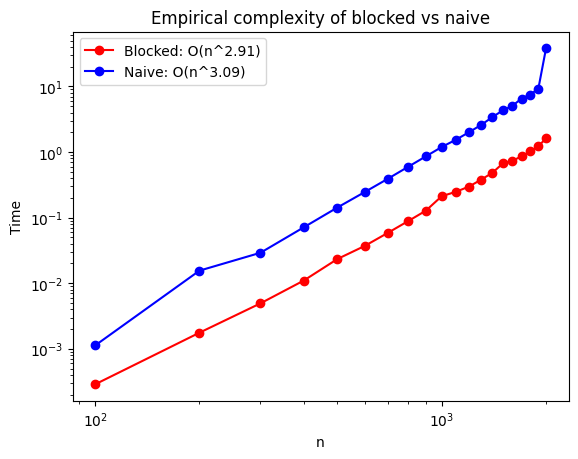

(2.9079934744029172, 3.0906491315379165)

In [89]:
plot_complexity(xs, new_fast_times, new_naive_times)